In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn import preprocessing
from scipy.interpolate import splrep, splev
import pandas as pd
import numpy as np
import math
from utils import MinMaxScaler

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'D2Coding'
path = 'D2Coding.ttf'
font_name = fm.FontProperties(fname=path, size=20).get_name()

### 전처리

In [13]:
data = pd.read_csv('dataset/data.csv', encoding='cp949')
data.head()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.84030,59.7862,51.71690,...,0.450421,NaN,NaN,859.854,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.44150,61.6286,50.44530,...,0.450356,1.146260e-10,860.338,859.780,860.044,859.786,294.658,272.538,328.734,328.865
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.14600,68.4386,78.10990,61.5414,52.01960,...,0.450341,1.145200e-10,860.338,859.780,859.981,859.724,294.658,272.538,328.734,328.805
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.17675,68.4999,77.50725,60.6663,52.69425,...,0.450201,1.144670e-10,860.338,859.842,859.950,859.599,294.719,272.538,328.674,328.865
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.20750,68.4386,76.02620,61.1634,51.69150,...,0.450235,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808


In [67]:
data.describe()

,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
count,2.939722e+06,2.939721e+06,2.939721e+06,2.939606e+06,2.939574e+06,2.939631e+06,2.935434e+06,2.939722e+06,2.939720e+06,2.939719e+06,2.939721e+06,2.939575e+06,2.939592e+06,2.939594e+06,2.939565e+06,2.939552e+06,2.939616e+06,2.939580e+06,2.939513e+06,2.939519e+06
mean,1.284422e+05,6.989404e+01,2.044708e+01,1.000061e+02,1.000198e+02,6.771864e+01,7.564373e+01,5.486239e+01,5.386029e+01,7.108925e+01,4.488618e-01,1.145580e-10,8.592077e+02,8.600021e+02,8.600029e+02,8.600062e+02,2.839963e+02,2.799293e+02,3.318062e+02,3.321773e+02
std,1.263704e+04,4.014802e+00,5.217123e+00,4.360371e-01,3.623526e-01,1.630768e+00,2.516083e+01,4.429079e+00,2.664304e+00,2.556959e+00,1.886477e-02,6.012797e-13,3.647667e+00,5.578480e-01,3.518205e-01,4.551778e-01,9.512770e+00,6.611579e+00,7.827379e-01,8.732977e-01
min,1.024100e+05,4.725320e+01,1.188830e-04,9.734210e+01,9.787060e+01,6.062440e+01,8.500550e-04,8.620010e+00,4.370450e-02,6.244200e-03,5.096370e-03,1.116620e-10,8.402980e+02,8.559290e+02,8.582800e+02,8.579920e+02,2.662300e+02,2.664260e+02,3.281610e+02,3.280730e+02
25%,1.194480e+05,6.842880e+01,1.891760e+01,9.981440e+01,9.989010e+01,6.656940e+01,6.496270e+01,5.332590e+01,5.238910e+01,6.967810e+01,4.484415e-01,1.142615e-10,8.579490e+02,8.597760e+02,8.598290e+02,8.598430e+02,2.747540e+02,2.735020e+02,3.318670e+02,3.321780e+02
50%,1.298890e+05,7.051660e+01,2.129310e+01,1.000020e+02,1.000190e+02,6.769720e+01,8.221040e+01,5.566540e+01,5.388620e+01,7.104540e+01,4.500620e-01,1.145550e-10,8.595750e+02,8.600220e+02,8.600020e+02,8.600000e+02,2.845860e+02,2.800200e+02,3.320170e+02,3.324230e+02
75%,1.391160e+05,7.237810e+01,2.338840e+01,1.001910e+02,1.001610e+02,6.897990e+01,9.536660e+01,5.757330e+01,5.541450e+01,7.247710e+01,4.517070e-01,1.148440e-10,8.602580e+02,8.602490e+02,8.601720e+02,8.601580e+02,2.933430e+02,2.863340e+02,3.321410e+02,3.326260e+02
max,1.480690e+05,8.729950e+01,4.753950e+01,1.024690e+02,1.018430e+02,7.149010e+01,1.000000e+02,7.727090e+01,6.601500e+01,8.739070e+01,9.091110e-01,1.329290e-10,8.772280e+02,8.660340e+02,8.701190e+02,8.821480e+02,2.985300e+02,2.916960e+02,3.327170e+02,3.331790e+02


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TAG_MIN            object 
 1   배정번호               int64  
 2   건조 1존 OP           float64
 3   건조 2존 OP           float64
 4   건조로 온도 1 Zone      float64
 5   건조로 온도 2 Zone      float64
 6   세정기                float64
 7   소입1존 OP            float64
 8   소입2존 OP            float64
 9   소입3존 OP            float64
 10  소입4존 OP            float64
 11  소입로 CP 값           float64
 12  소입로 CP 모니터 값       float64
 13  소입로 온도 1 Zone      float64
 14  소입로 온도 2 Zone      float64
 15  소입로 온도 3 Zone      float64
 16  소입로 온도 4 Zone      float64
 17  솔트 컨베이어 온도 1 Zone  float64
 18  솔트 컨베이어 온도 2 Zone  float64
 19  솔트조 온도 1 Zone      float64
 20  솔트조 온도 2 Zone      float64
dtypes: float64(19), int64(1), object(1)
memory usage: 471.0+ MB


월별로 데이터 추출

In [14]:
data['TAG_MIN'] = pd.to_datetime(data['TAG_MIN'])

In [15]:
data['month'] = data['TAG_MIN'].dt.to_period('M')

In [69]:
data.isnull().sum()

TAG_MIN                 0
배정번호                    0
건조 1존 OP                1
건조 2존 OP                1
건조로 온도 1 Zone         116
건조로 온도 2 Zone         148
세정기                    91
소입1존 OP              4288
소입2존 OP                 0
소입3존 OP                 2
소입4존 OP                 3
소입로 CP 값                1
소입로 CP 모니터 값          147
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
소입로 온도 3 Zone         157
소입로 온도 4 Zone         170
솔트 컨베이어 온도 1 Zone     106
솔트 컨베이어 온도 2 Zone     142
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
dtype: int64

In [71]:
data.isnull().sum().sum()

6043

In [5]:
data = data.dropna(axis=0)

In [6]:
len(data)

2935045

In [16]:
data.groupby(by='month')

In [17]:
data3 = data[data['month'] == '2022-03']

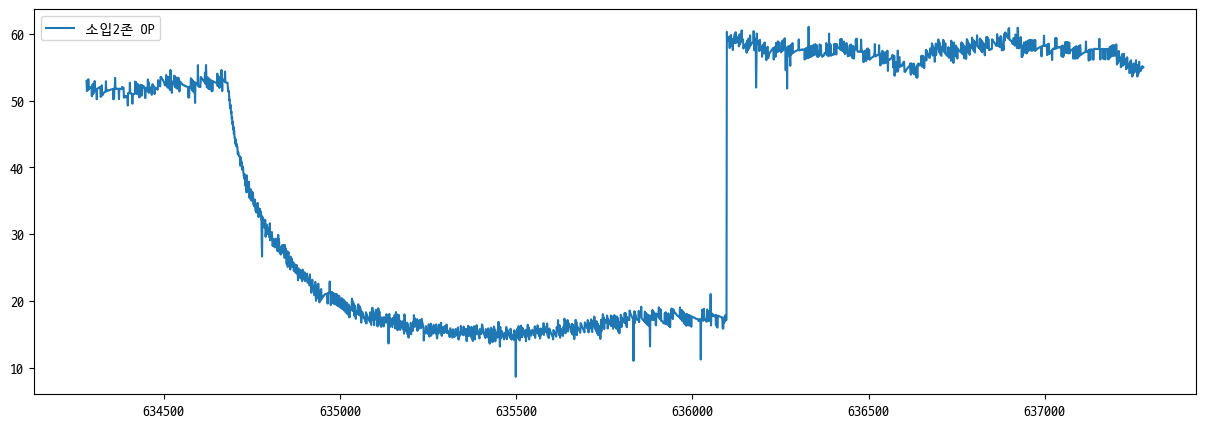

In [30]:
plt.figure(figsize=(15,5))
a = 101000
plt.plot(data3['소입2존 OP'][a:a+3000], label='소입2존 OP')
# plt.plot(data3['소입3존 OP'][a:a+303000], label='소입3존 OP')
# plt.plot(data3['건조 1존 OP'][a:a+303000], label='건조 1존 OP')
# # plt.plot(data3['건조 2존 OP'][a:a+303000], label='건조 2존 OP')
# plt.plot(data3['소입로 온도 2 Zone'][a:a+303000], label='소입로 온도 2 Zone')
# plt.plot(data3['소입로 온도 3 Zone'][a:a+303000], label='소입로 온도 3 Zone')
plt.legend()

### FFT

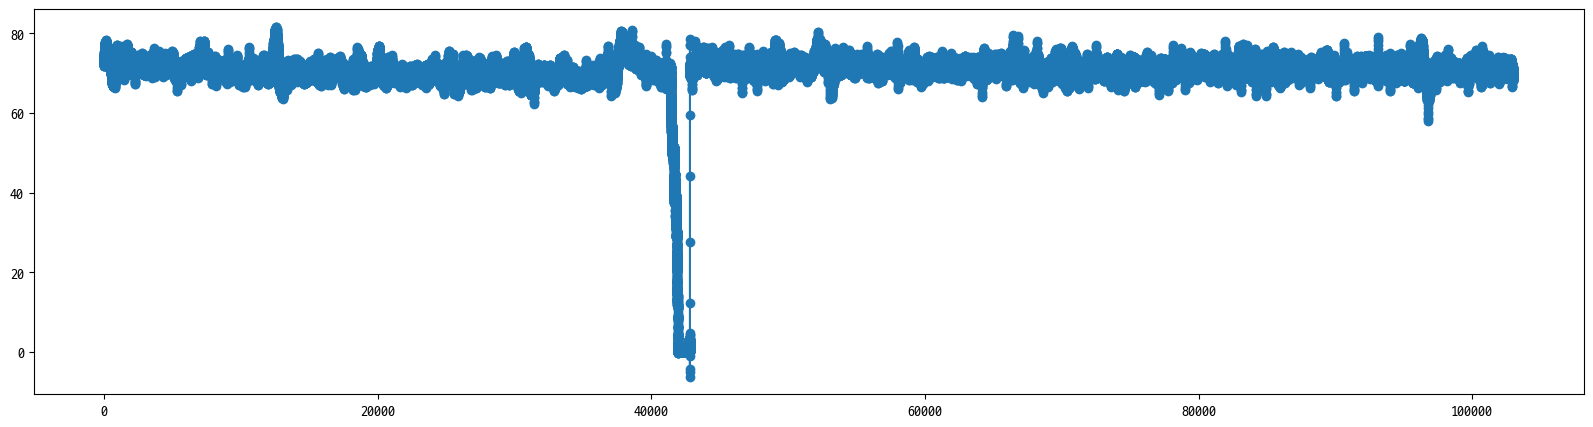

In [268]:
fs = 5
dt = 1/fs

spl = splrep([i for i in range(len(after_data))], after_data['소입4존 OP'])
x1 = np.arange(0, len(after_data), dt)
y1 = splev(x1, spl)

plt.figure(figsize=(20, 5))
plt.plot(x1, y1, marker='o')
plt.show()

In [216]:
len(data3)

493960

In [217]:
len(y1)

493960

In [269]:
# 주파수 생성 
# nfft = 샘플 개수
nfft = len(x1) 
# df = 주파수 증가량
df = fs/nfft 
k = np.arange(nfft) 
# f = 0부터~최대주파수까지의 범위
f = k*df 

# 스펙트럼은 중앙을 기준으로 대칭이 되기 때문에 절반만 구함
nfft_half = math.trunc(nfft/2)
f0 = f[range(nfft_half)] 
# 증폭값을 두 배로 계산(위에서 1/2 계산으로 인해 에너지가 반으로 줄었기 때문)
fft_y = np.fft.fft(y1)/nfft * 2 
fft_y0 = fft_y[range(nfft_half)]
# 벡터(복소수)의 norm 측정(신호 강도)
amp = abs(fft_y0)

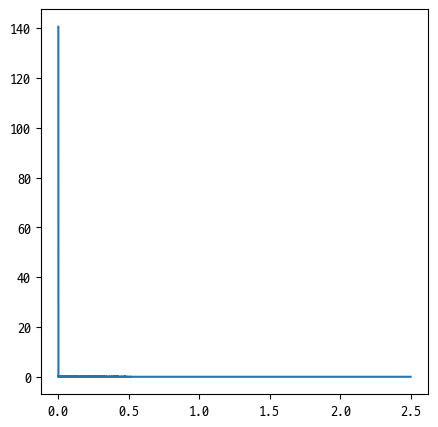

In [270]:
if True:  
    plt.figure(figsize=(5,5))  
    plt.plot(f0, amp)
    plt.show()

In [271]:
# 상위 10개의 주파수
idxy = np.argsort(-amp)  
for i in range(10):  
    print('freq=', f0[idxy[i]], 'amp=', fft_y[idxy[i]])

freq= 0.0 amp= (140.57322577839355+0j)
freq= 0.00011650485436893204 amp= (-1.4585992148234053-0.7871710367779998j)
freq= 9.70873786407767e-06 amp= (1.1028149509321008+1.2300794048859778j)
freq= 0.00014563106796116503 amp= (-1.0530763711676667+1.2303318753585901j)
freq= 6.796116504854369e-05 amp= (-1.2094140917646938-1.0695355714104209j)
freq= 0.0001553398058252427 amp= (1.533099436401426-0.4984881018168544j)
freq= 0.00013592233009708738 amp= (0.24177698232644584-1.5877779552507405j)
freq= 0.00010679611650485436 amp= (1.5880146703488571-0.18772290413114576j)
freq= 0.0001262135922330097 amp= (0.7825977970581318+1.3922402470790909j)
freq= 3.883495145631068e-05 amp= (0.912899428735229-1.2898321754526263j)


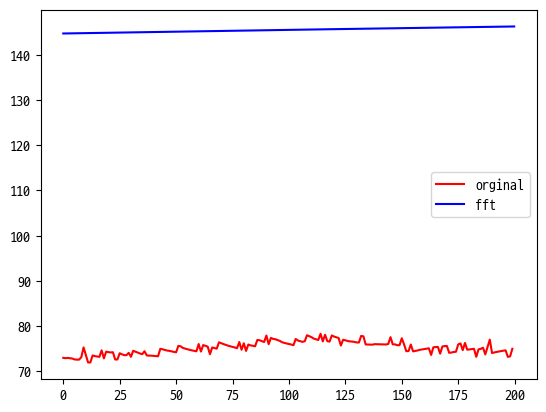

In [272]:
# 상위 20개의 주파수로 복원해서 원본이랑 비교해보기
# 20개의 주파수만 더해도 어느정도 복원된것을 확인할 수 있음
newy = np.zeros((nfft,)) 
arfreq = [] 
arcoec = [] 
arcoes = [] 

for i in range(20): 
    freq = f0[idxy[i]] 
    yx = fft_y[idxy[i]] 
    coec = yx.real 
    coes = yx.imag * -1 
    newy += coec * np.cos(2 * np.pi * freq * x1) + coes * np.sin(2 * np.pi * freq * x1) 
    arfreq.append(freq) 
    arcoec.append(coec) 
    arcoes.append(coes)

plt.figure() 
plt.plot([i for i in range(200)], after_data['소입4존 OP'][:200], c='r', label='orginal') 
plt.plot(x1[:1000], newy[:1000], c='b', label='fft') 
plt.legend() 
plt.show()

In [256]:
plt.figure(figsize=(20,15)) 
plti = 0 
ncnt = 11
newy = np.zeros((nfft,)) 

for i in range(ncnt+1): 
    freq = f0[idxy[i]] 
    yx = fft_y[idxy[i]] 
    coec = yx.real 
    coes = yx.imag * -1 
    newy += coec * np.cos(2 * np.pi * freq * x1) + coes * np.sin(2 * np.pi * freq * x1) 
    
    plti+=1 
    plt.subplot(4,4, plti) 
    plt.title("N={}".format(i+1)) 
    plt.plot([i for i in range(len(data3))], data3['소입4존 OP'], label='original')
    plt.plot(x1, newy, label='fft')
    plt.legend()

Error in callback <function flush_figures at 0x136ff13a0> (for post_execute):


KeyboardInterrupt: 

### 데이터 합치기

In [31]:
data3 = data3[60000:363000]

In [32]:
len(data3)

303000

In [33]:
data7 = data[data['month'] == '2022-07']

In [34]:
len(data7)

324965

In [35]:
data = pd.concat([data3, data7])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335506 entries, 533286 to 2939721
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   TAG_MIN            335506 non-null  datetime64[ns]
 1   배정번호               335506 non-null  int64         
 2   건조 1존 OP           335506 non-null  float64       
 3   건조 2존 OP           335506 non-null  float64       
 4   건조로 온도 1 Zone      335496 non-null  float64       
 5   건조로 온도 2 Zone      335498 non-null  float64       
 6   세정기                335500 non-null  float64       
 7   소입1존 OP            335306 non-null  float64       
 8   소입2존 OP            335506 non-null  float64       
 9   소입3존 OP            335505 non-null  float64       
 10  소입4존 OP            335505 non-null  float64       
 11  소입로 CP 값           335506 non-null  float64       
 12  소입로 CP 모니터 값       335489 non-null  float64       
 13  소입로 온도 1 Zone      335498 non-null  float64

### 결측치 비교

In [140]:
dd1 = pd.DataFrame()
dd1['idx'] = [i for i in range(len(data))]
dd1['소입1존 OP'] = data['소입1존 OP']

In [141]:
dd1.isnull().sum()

idx           0
소입1존 OP    4288
dtype: int64

In [142]:
dd1 = dd1.dropna(axis=0)

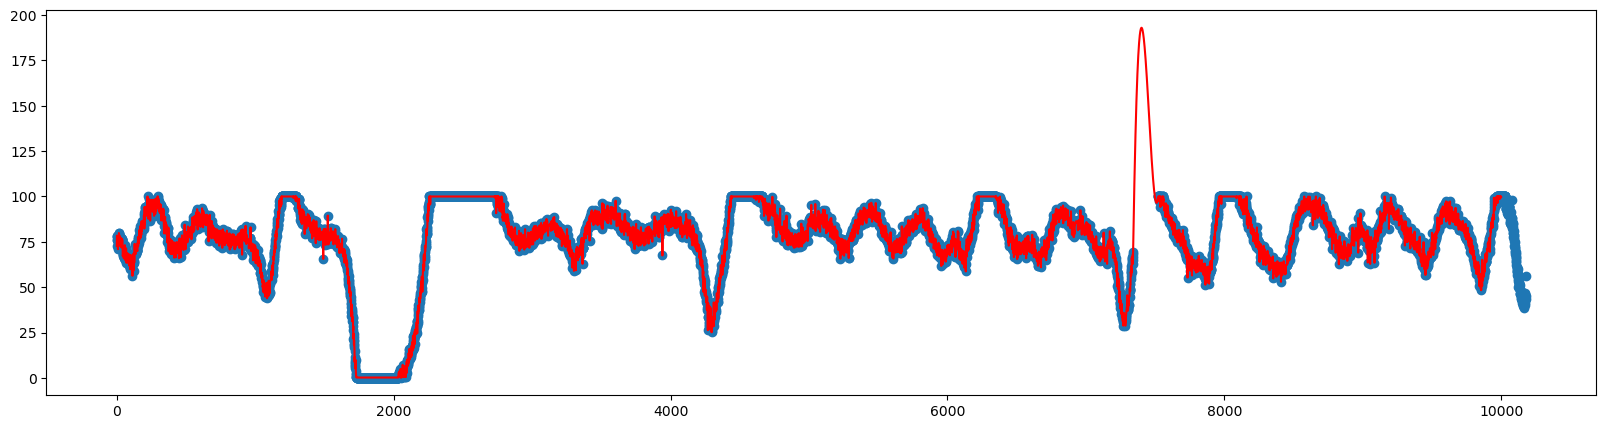

In [143]:
# 보간법
dd = dd1['소입1존 OP']
x0 = dd1['idx']

spl = splrep(x0, dd)
x1 = np.linspace(0, len(data), len(data))
y1 = splev(x1, spl)

plt.figure(figsize=(20, 5))
plt.plot(x0[:10000], dd[:10000],'o')
plt.plot(x1[:10000], y1[:10000], 'r')
plt.show()

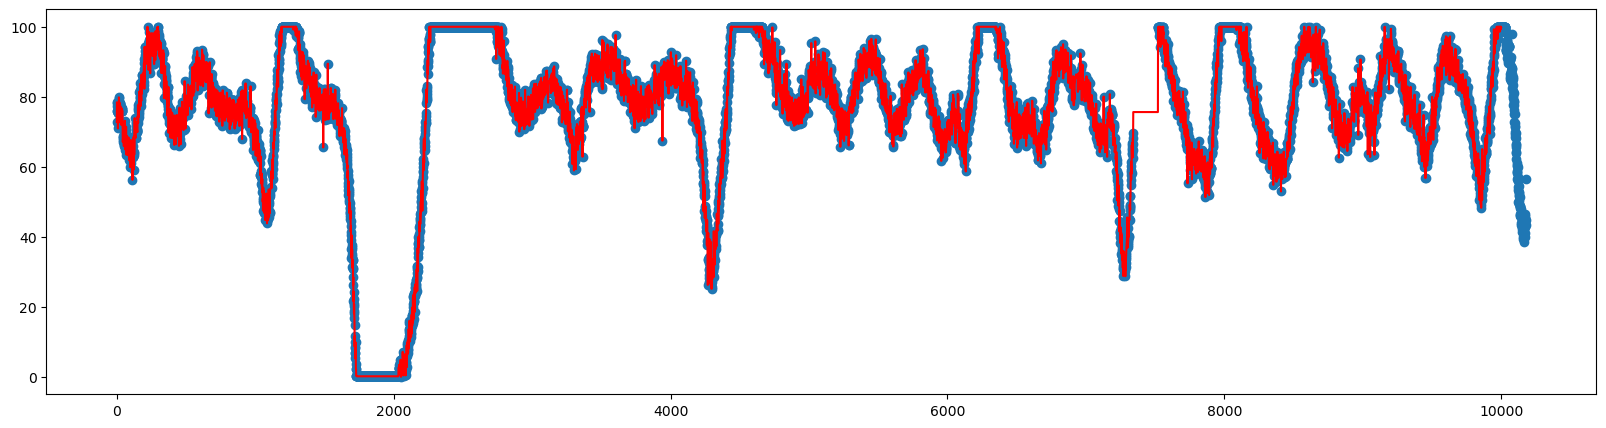

In [144]:
# 평균값
dd = dd1['소입1존 OP']
x0 = dd1['idx']

x1 = [i for i in range(len(data))]
y1 = data['소입1존 OP'].fillna(data['소입1존 OP'].mean())

plt.figure(figsize=(20, 5))
plt.plot(x0[:10000], dd[:10000],'o')
plt.plot(x1[:10000], y1[:10000], 'r')
plt.show()

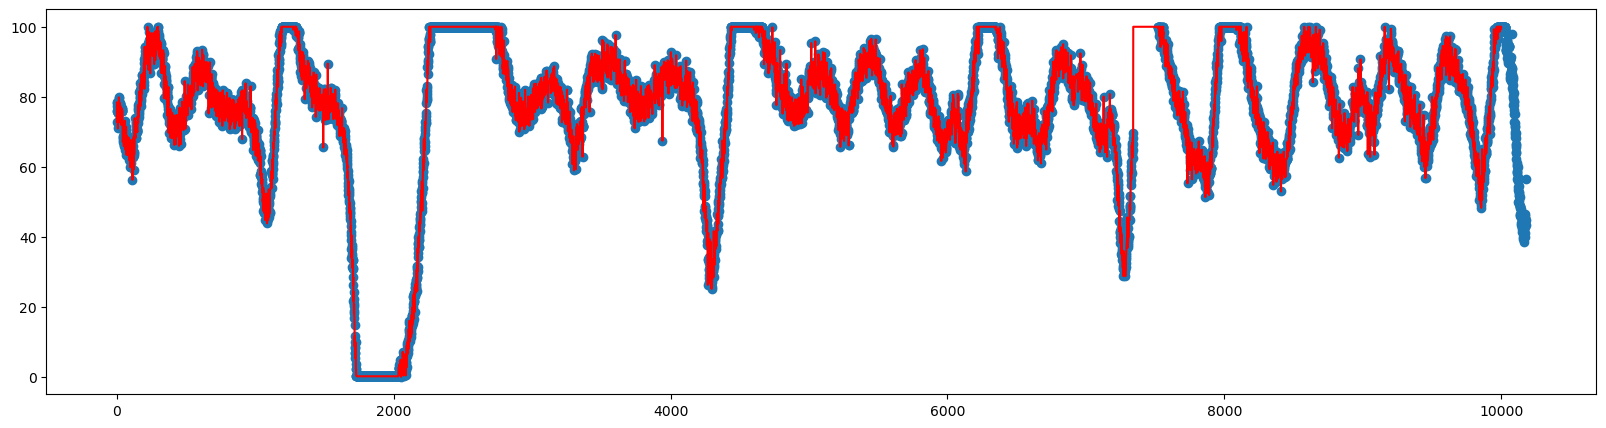

In [145]:
# 최빈값
dd = dd1['소입1존 OP']
x0 = dd1['idx']

x1 = [i for i in range(len(data))]
y1 = data['소입1존 OP'].fillna(data['소입1존 OP'].mode()[0])

plt.figure(figsize=(20, 5))
plt.plot(x0[:10000], dd[:10000],'o')
plt.plot(x1[:10000], y1[:10000], 'r')
plt.show()

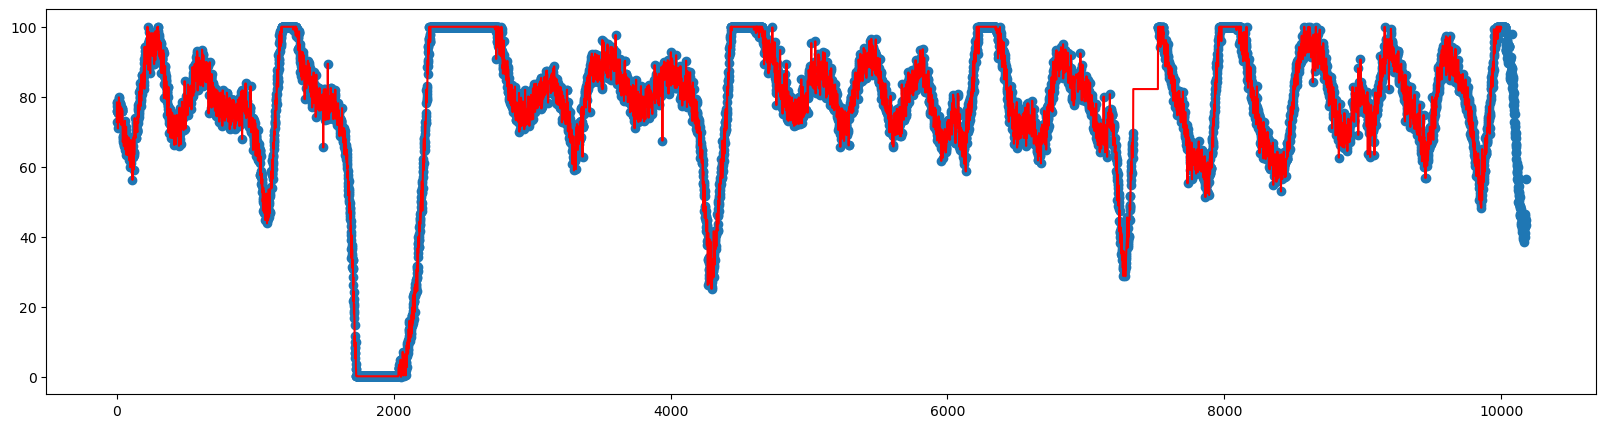

In [146]:
# 중간값
dd = dd1['소입1존 OP']
x0 = dd1['idx']

x1 = [i for i in range(len(data))]
y1 = data['소입1존 OP'].fillna(data['소입1존 OP'].median())

plt.figure(figsize=(20, 5))
plt.plot(x0[:10000], dd[:10000],'o')
plt.plot(x1[:10000], y1[:10000], 'r')
plt.show()

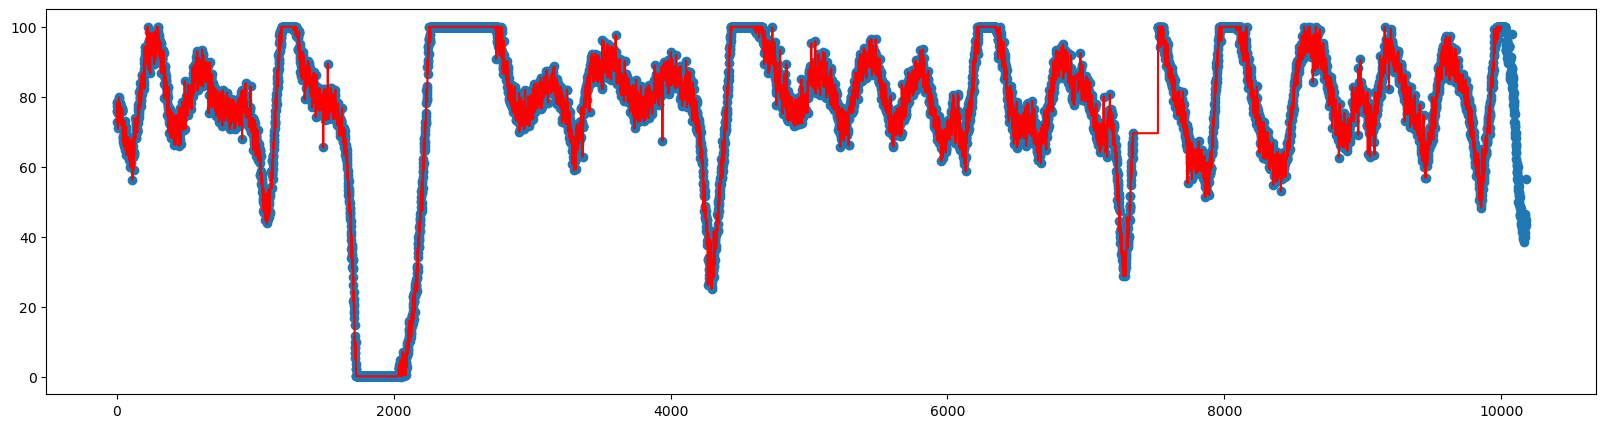

In [147]:
# 앞
dd = dd1['소입1존 OP']
x0 = dd1['idx']

x1 = [i for i in range(len(data))]
y1 = data['소입1존 OP'].fillna(method = 'ffill') 

plt.figure(figsize=(20, 5))
plt.plot(x0[:10000], dd[:10000],'o')
plt.plot(x1[:10000], y1[:10000], 'r')
plt.show()

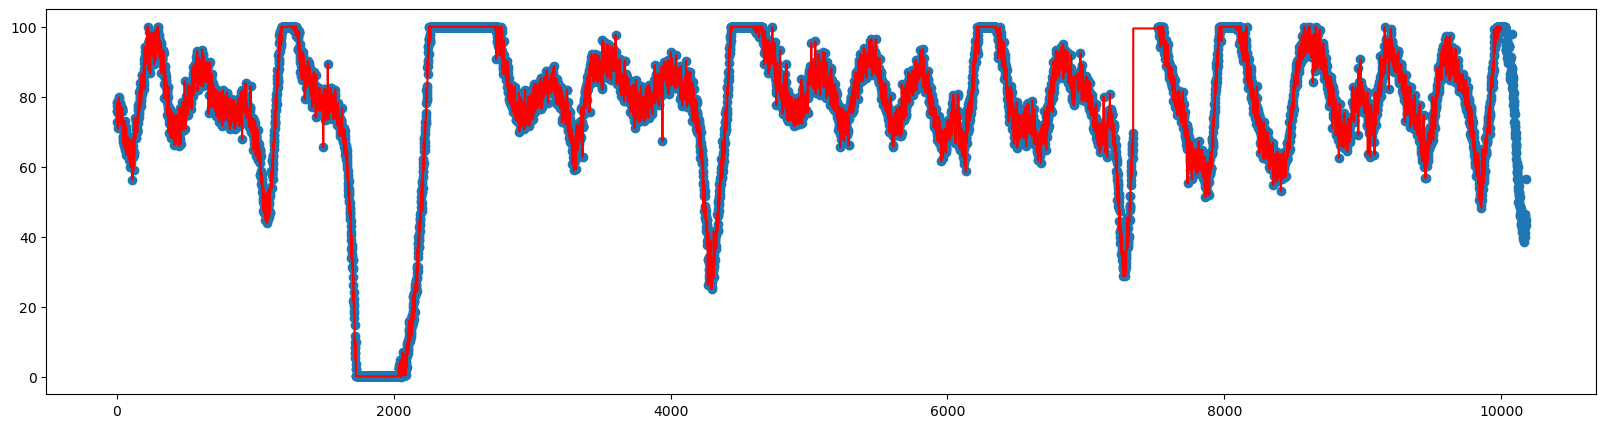

In [148]:
# 뒤
dd = dd1['소입1존 OP']
x0 = dd1['idx']

x1 = [i for i in range(len(data))]
y1 = data['소입1존 OP'].fillna(method='bfill')

plt.figure(figsize=(20, 5))
plt.plot(x0[:10000], dd[:10000],'o')
plt.plot(x1[:10000], y1[:10000], 'r')

plt.show()

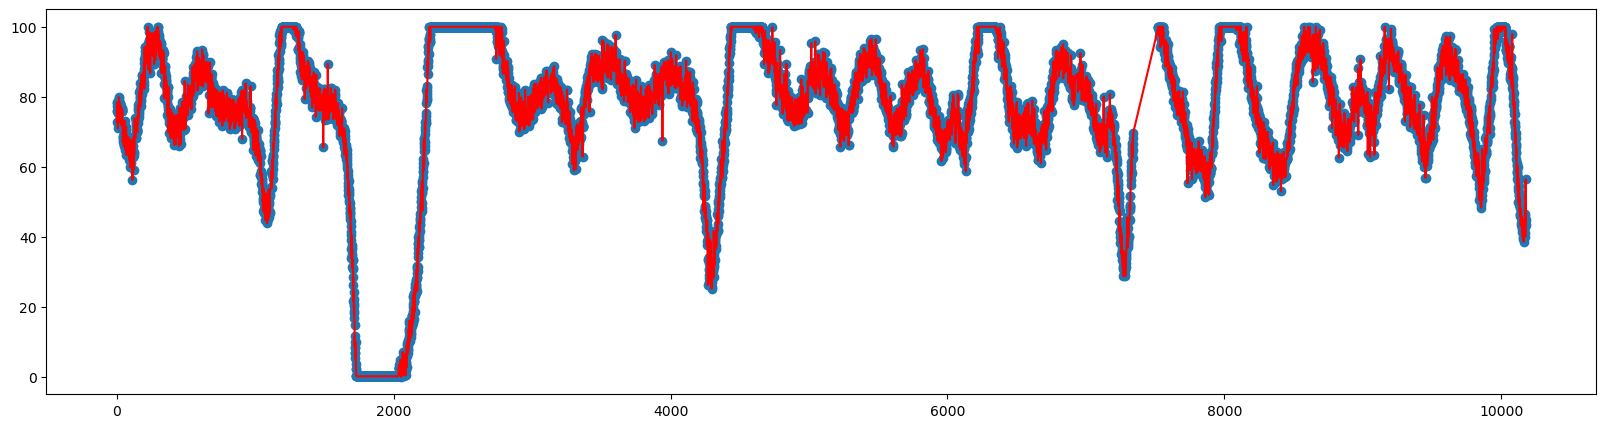

In [151]:
plt.figure(figsize=(20, 5))
plt.plot(x0[:10000], dd[:10000],'o')
plt.plot(data['소입1존 OP'].dropna()[:10000], 'r')

In [ ]:
len(y1)

In [ ]:
data['소입1존 OP'].isnull().sum()

In [ ]:
y_new = pd.DataFrame()
y_new['소입'] = y1

In [ ]:
y_new['소입'].isnull().sum()

In [ ]:
for col in data.columns:
    print(col, ':', len(data[col].value_counts()))

### 레이블

In [28]:
# data = data.drop(columns=['month'])

In [36]:
import matplotlib
import matplotlib.font_manager as fm
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'D2Coding'
path = 'D2Coding.ttf'
font_name = fm.FontProperties(fname=path, size=20).get_name()
# 음수 부호 미노출 오류 제거
matplotlib.rcParams['axes.unicode_minus'] = False

In [37]:
import seaborn as sns
plt.figure(figsize=(25,15))
target_cor = data.corr().loc[['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone', '건조로 온도 2 Zone', '세정기', '소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP',
       '소입로 CP 값', '소입로 CP 모니터 값', '소입로 온도 1 Zone', '소입로 온도 2 Zone',
       '소입로 온도 3 Zone', '소입로 온도 4 Zone',
       '솔트 컨베이어 온도 1 Zone', '솔트 컨베이어 온도 2 Zone',
       '솔트조 온도 1 Zone', '솔트조 온도 2 Zone']]
sns.heatmap(target_cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

TypeError: float() argument must be a string or a number, not 'Period'

<Figure size 2500x1500 with 0 Axes>

상관관계 0.7 이상  

소입 1존 OP, 소입로 온도 1 Zone  
-> 소입 1존 선택  
소입 4존 OP, 소입로 온도 4 Zone  
-> 소입로 온도 4 Zone 선택  

In [38]:
data.drop(['소입1존 OP', '소입로 온도 4 Zone'], axis=1, inplace=True)

In [39]:
data['이상치개수'] = 0
for col in data.columns:
    if col == 'month':
        continue
    thirdq, firstq = data[col].quantile(0.75), data[col].quantile(0.25)
    interquartilerange = 1.5*(thirdq-firstq)
    outlierhigh, outlierlow = interquartilerange+thirdq, firstq-interquartilerange
    for i in data.index:
        if data[col][i] > outlierhigh or data[col][i] < outlierlow:
            data['이상치개수'][i] += 1
data.head()

/var/folders/f4/tmy3_62j52n251v90rm6sc700000gn/T/ipykernel_25917/2282862945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['이상치개수'][i] += 1
/var/folders/f4/tmy3_62j52n251v90rm6sc700000gn/T/ipykernel_25917/2282862945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['이상치개수'][i] += 1
/var/folders/f4/tmy3_62j52n251v90rm6sc700000gn/T/ipykernel_25917/2282862945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['이상

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입2존 OP,소입3존 OP,소입4존 OP,...,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone,month,이상치개수
593293,2022-03-04 20:40:28,117694,71.3435,20.0855,100.281,100.051,67.5609,61.0550,53.2666,71.95610,...,1.143530e-10,854.034,860.033,859.883,274.426,282.530,331.942,332.518,2022-03,1
593294,2022-03-04 20:40:29,117694,71.3785,20.0374,100.281,100.051,67.4995,59.3107,53.2751,73.51005,...,1.143530e-10,854.096,860.096,859.883,274.426,282.530,331.942,332.518,2022-03,1
593295,2022-03-04 20:40:30,117694,71.4088,19.9952,100.281,100.051,67.5609,57.6919,54.7140,73.36170,...,1.142480e-10,854.034,860.158,859.821,274.365,282.469,331.942,332.518,2022-03,1
593296,2022-03-04 20:40:31,117694,71.4350,17.6988,100.342,100.051,67.4995,60.6405,53.0990,73.27390,...,1.143530e-10,854.096,860.033,859.883,274.365,282.530,331.942,332.579,2022-03,1
593297,2022-03-04 20:40:32,117694,71.5795,17.7805,100.281,100.051,67.6222,60.5057,51.4870,73.19360,...,1.144590e-10,854.096,860.033,859.945,274.365,282.469,331.942,332.458,2022-03,1


In [40]:
len(data)

627965

In [65]:
data['이상치개수'].value_counts()

이상치개수
0     316741
1     153731
2      80393
3      48939
4      17585
5       5914
7       2566
9        662
8        605
10       384
12       238
11       173
13        34
Name: count, dtype: int64

In [43]:
data3['이상치개수'].value_counts()

이상치개수
0     191702
1      56060
2      24603
3      15872
4       7388
5       3486
7       1959
9        632
8        471
10       382
12       238
11       173
13        34
Name: count, dtype: int64

In [44]:
data7['이상치개수'].value_counts()

이상치개수
0     125039
1      97671
2      55790
3      33067
4      10197
5       2428
7        607
8        134
9         30
10         2
Name: count, dtype: int64

In [46]:
print(f"3월: {len(data3)}, 7월: {len(data7)}")

3월: 303000, 7월: 324965


In [66]:
data['설비 이상신호'] = np.where(data['이상치개수'] <8, 0, 1)
data['설비 이상신호'].value_counts()

설비 이상신호
0    625869
1      2096
Name: count, dtype: int64

In [67]:
data.groupby(by='month')

In [74]:
data3 = data[data['month'] == '2022-03']
data7 = data[data['month'] == '2022-07']

In [69]:
data3 = data3.drop(columns=['이상치개수'])
data3 = data3.drop(columns=['month'])
data7 = data7.drop(columns=['이상치개수'])
data7 = data7.drop(columns=['month'])

In [24]:
len(data7)

324965

In [25]:
len(data3)

103000

In [54]:
data3.to_csv('test_03.csv', index=False)

In [106]:
data7 = pd.read_csv('test_07.csv')

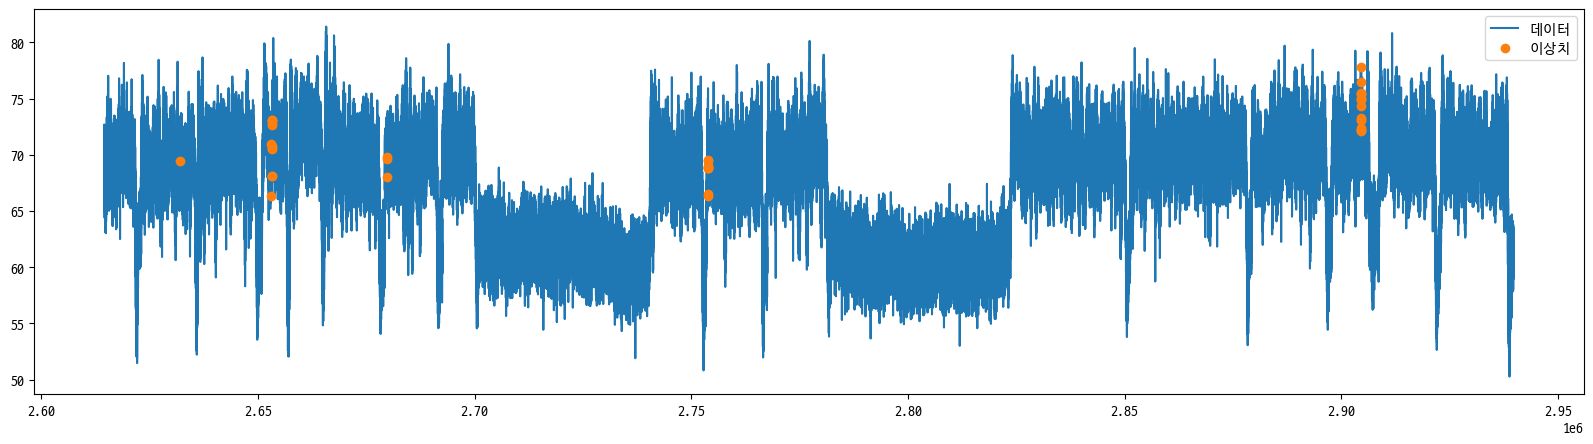

In [64]:
plt.figure(figsize=(20,5))
plt.plot(data7['건조 1존 OP'], label='데이터')
plt.plot(abnormal['건조 1존 OP'], 'o', label='이상치')
plt.legend()

In [75]:
normal = data7[data7['이상치개수'] < 3]
abnormal = data7[data7['설비 이상신호'] == 1]

print(f"정상: {len(normal)}, 비정상: {len(abnormal)}")

정상: 278500, 비정상: 166


In [72]:
normal = data7[data7['설비 이상신호'] == 0]
abnormal = data7[data7['설비 이상신호'] == 1]

print(f"정상: {len(normal)}, 비정상: {len(abnormal)}")

정상: 324799, 비정상: 166


In [76]:
normal.drop(columns=['이상치개수'], inplace=True)
normal.drop(columns=['month'], inplace=True)
abnormal.drop(columns=['이상치개수'], inplace=True)
abnormal.drop(columns=['month'], inplace=True)

/var/folders/f4/tmy3_62j52n251v90rm6sc700000gn/T/ipykernel_25917/787747951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal.drop(columns=['이상치개수'], inplace=True)
/var/folders/f4/tmy3_62j52n251v90rm6sc700000gn/T/ipykernel_25917/787747951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal.drop(columns=['month'], inplace=True)
/var/folders/f4/tmy3_62j52n251v90rm6sc700000gn/T/ipykernel_25917/787747951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [53]:
normal = data3[data3['설비 이상신호'] == 0]
abnormal = data3[data3['설비 이상신호'] == 1]

print(f"정상: {len(normal)}, 비정상: {len(abnormal)}")

정상: 301070, 비정상: 1930


In [77]:
normal.to_csv('normal_012_07.csv', index=False)
# abnormal.to_csv('abnormal_07.csv', index=False)

### 이상치

In [152]:
data = pd.read_csv('../dataset/normal_012_07.csv')
data = data.drop(columns=['TAG_MIN', '배정번호', '설비 이상신호'])

In [153]:
data, max_, min_ = MinMaxScaler(data)

In [93]:
data7 = pd.read_csv('../dataset/test_03.csv')
dropped_data = data7.drop(columns=['TAG_MIN', '배정번호', '설비 이상신호'])
data, _, _ = MinMaxScaler(dropped_data, max_, min_)

In [63]:
data

array([[0.67681685, 0.49409218, 0.61446228, ..., 0.61900923, 0.43283582,
        0.90392749],
       [0.67803488, 0.49290894, 0.61446228, ..., 0.61900923, 0.43283582,
        0.90392749],
       [0.67908934, 0.49187083, 0.61446228, ..., 0.61627699, 0.43283582,
        0.90392749],
       ...,
       [0.67291918, 0.57420813, 0.56281129, ..., 0.80099436, 0.44195688,
        1.07311178],
       [0.67419637, 0.51998325, 0.56281129, ..., 0.79767984, 0.48590381,
        1.06706949],
       [0.67531347, 0.52097461, 0.56281129, ..., 0.79767984, 0.48590381,
        1.06706949]])

In [103]:
data = data[-2500:]

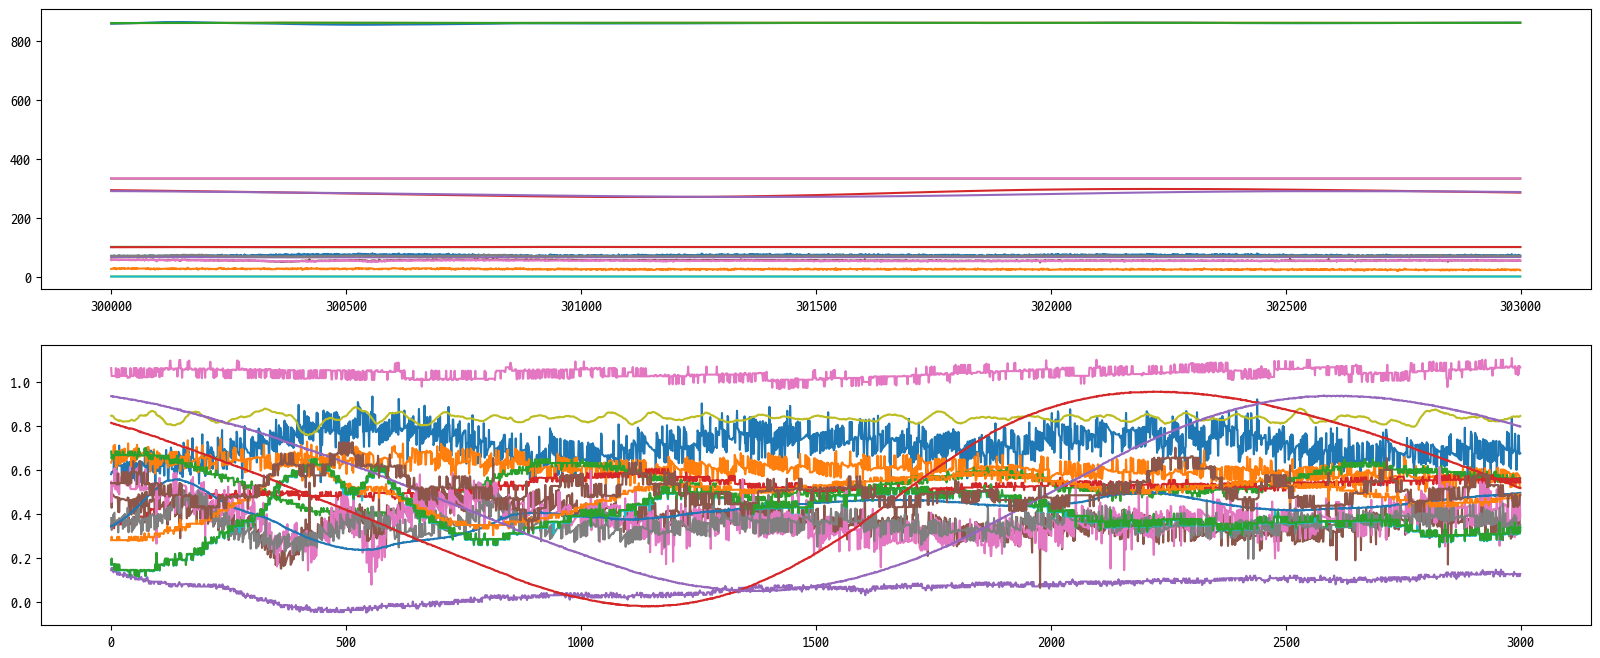

In [96]:
plt.figure(figsize=(20,8))
plt.subplot(2, 1, 1)
plt.plot(dropped_data[-3000:])
plt.subplot(2, 1, 2)
plt.plot(data)

In [154]:
def create_anomaly(data, start_index=100,  duration=60, series_num=0):
    base_value = data[start_index, series_num]
    data[start_index:start_index + duration, series_num] = base_value + np.random.normal(loc=0, scale=0.3, size=duration)

In [11]:
len(data[0])

17

In [12]:
len(data)

3000

이상치 (start, duration)
- 9 14 16   (500, 90)
- 1 5 10    (1000, 30)
- 3 7 13    (1500, 60)
- 4 8 15    (1700, 60)
- 2 6 9 12  (2350, 30)

- 10,5,11   (0, 50)
- 10, 13, 14, 3 (2125, 150)

In [155]:
# create_anomaly(data,  start_index=0,  duration=50, series_num=6)
# create_anomaly(data,  start_index=0,  duration=50, series_num=10)
# create_anomaly(data,  start_index=0,  duration=50, series_num=11)

create_anomaly(data,  start_index=500,  duration=90, series_num=9)
create_anomaly(data,  start_index=500,  duration=90, series_num=14)
create_anomaly(data,  start_index=500,  duration=90, series_num=16)

create_anomaly(data,  start_index=1000,  duration=30, series_num=1)
create_anomaly(data,  start_index=1000,  duration=30, series_num=5)
create_anomaly(data,  start_index=1000,  duration=30, series_num=10)

create_anomaly(data,  start_index=1500,  duration=60, series_num=3)
create_anomaly(data,  start_index=1500,  duration=60, series_num=7)
create_anomaly(data,  start_index=1500,  duration=60, series_num=13)

create_anomaly(data,  start_index=1700,  duration=60, series_num=4)
create_anomaly(data,  start_index=1700,  duration=60, series_num=8)
create_anomaly(data,  start_index=1700,  duration=60, series_num=15)

# create_anomaly(data,  start_index=2125,  duration=150, series_num=3)
# create_anomaly(data,  start_index=2125,  duration=150, series_num=10)
# create_anomaly(data,  start_index=2125,  duration=150, series_num=13)
# create_anomaly(data,  start_index=2125,  duration=150, series_num=14)

create_anomaly(data,  start_index=2350,  duration=30, series_num=2)
create_anomaly(data,  start_index=2350,  duration=30, series_num=6)
create_anomaly(data,  start_index=2350,  duration=30, series_num=9)
create_anomaly(data,  start_index=2350,  duration=30, series_num=12)

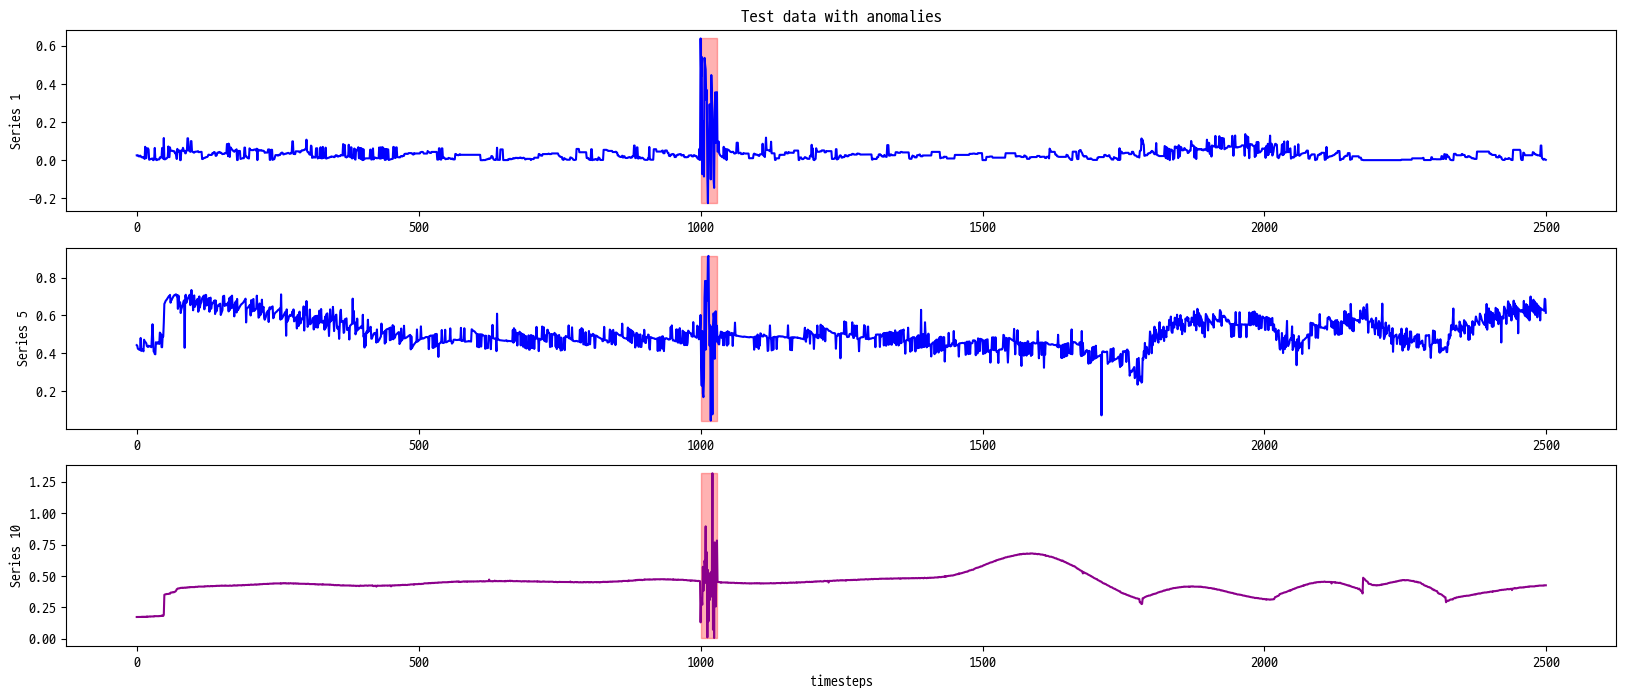

In [106]:
fig, ax = plt.subplots(3,1, figsize=(20,8))
start = 1000
duration = 30
root_cause = [1, 5, 10]
ax[0].set_title('Test data with anomalies')
ax[0].plot(data[:,root_cause[0]], color='blue')
ax[0].fill_between(np.arange(start,start+duration), y1=min(data[:,root_cause[0]]), y2=max(data[:,root_cause[0]]), color='red', alpha=0.3)
ax[0].set_ylabel(f'Series {root_cause[0]}')
ax[1].plot(data[:,root_cause[1]], color='blue')
ax[1].fill_between(np.arange(start,start+duration), y1=min(data[:,root_cause[1]]), y2=max(data[:,root_cause[1]]), color='red', alpha=0.3)
ax[1].set_ylabel(f'Series {root_cause[1]}')
ax[2].plot(data[:,root_cause[2]], color='darkmagenta')
ax[2].fill_between(np.arange(start,start+duration), y1=min(data[:,root_cause[2]]), y2=max(data[:,root_cause[2]]), color='red', alpha=0.3)
ax[2].set_ylabel(f'Series {root_cause[2]}')
ax[2].set_xlabel('timesteps')
plt.show()

2


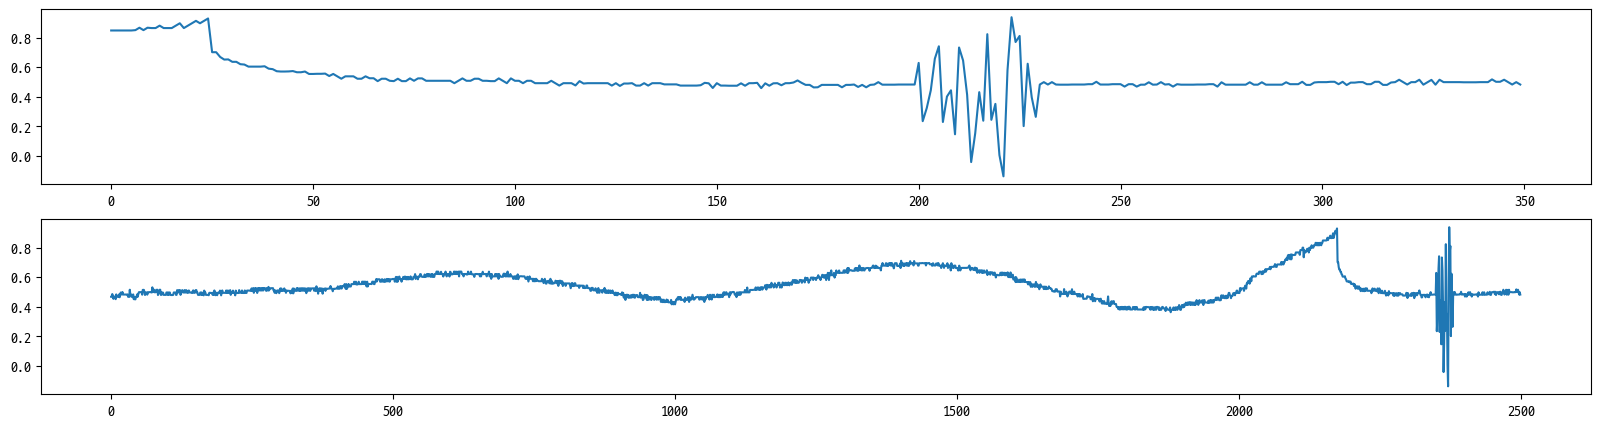

In [151]:
n = 2
plt.figure(figsize=(20,5))
plt.subplot(2, 1, 1)
plt.plot(data[2150:2500,n])
plt.subplot(2, 1, 2)
plt.plot(data[:,n])
print(n)

In [100]:
import pickle

with open('anomaly_test_full.pkl', 'wb') as f:
    pickle.dump(data, f)

In [66]:
with open('anomaly_test.pkl', 'rb') as f:
    tt = pickle.load(f)

### 데이터 확인

In [79]:
pre_data = data.drop(columns=['TAG_MIN'])
pre_data = preprocessing.MinMaxScaler().fit_transform(pre_data)

In [83]:
data.drop(columns=['TAG_MIN'], inplace=True)

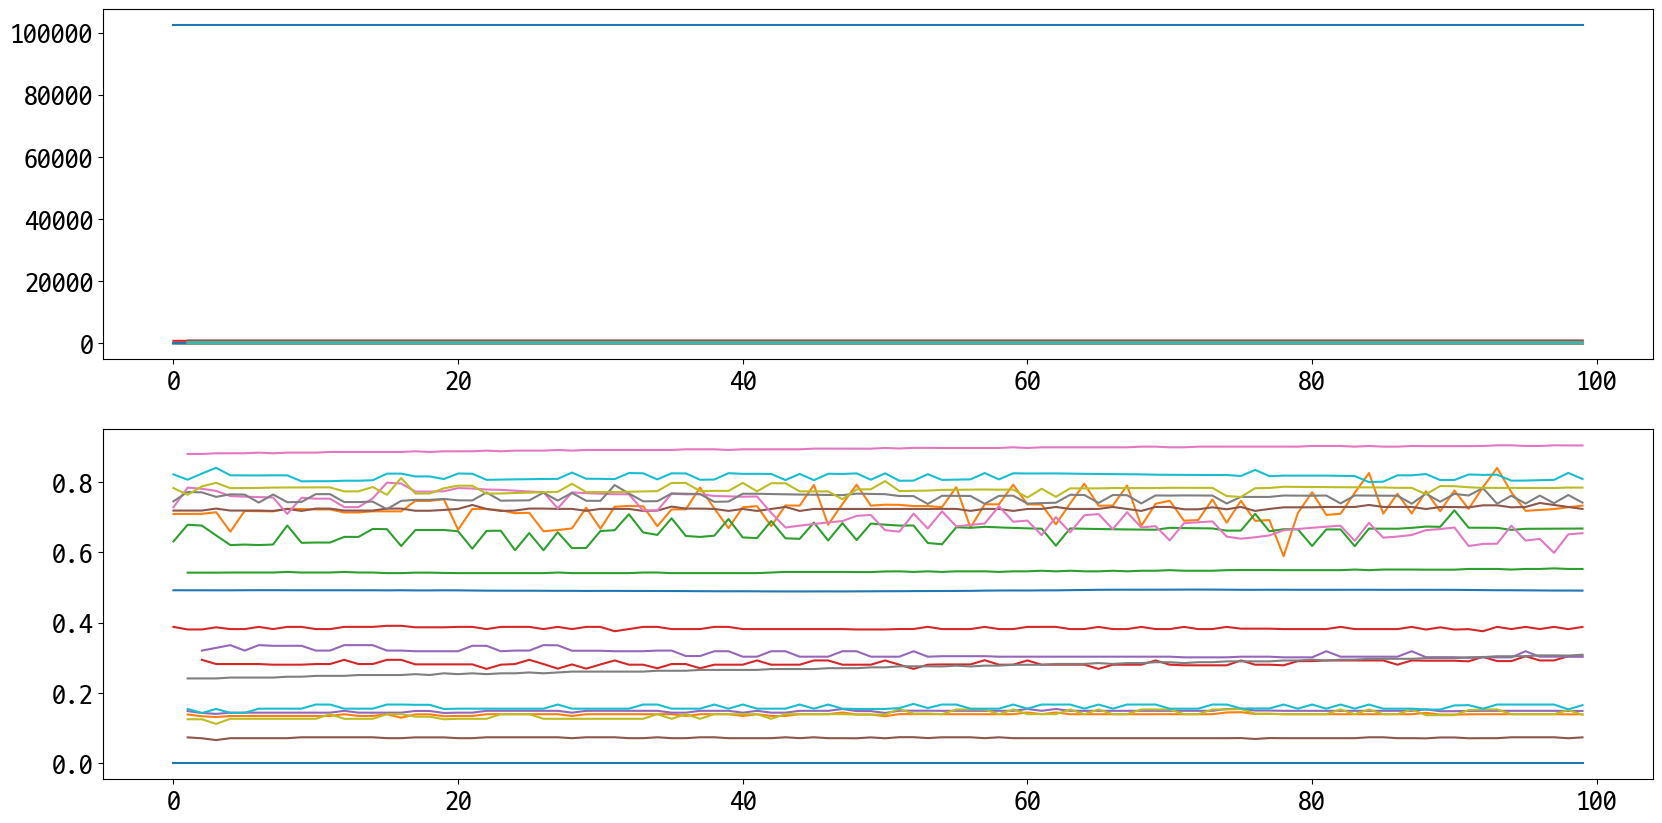

In [88]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(data[:100])
plt.subplot(2, 1, 2)
plt.plot(pre_data[:100])

In [ ]:
quality = pd.read_csv('dataset/quality.csv')
quality.head()

In [ ]:
quality.describe()

In [ ]:
train = pd.read_csv('dataset/train.csv', encoding='cp949')
train.head()

In [ ]:
x = [i for i in range(len(train))]
plt.figure(figsize=(20, 5))
plt.subplot(3, 1, 1)
plt.title("dry 1 zone OP")
plt.plot(x, train['건조 1존 OP_Avg'])
plt.subplot(3, 1, 2)
plt.title("dry 2 zone")
plt.plot(x, train['건조로 온도 2 Zone_Avg'])
plt.xlabel('time')
plt.subplot(3, 1, 3)
plt.plot(x, train['소입로 온도 4 Zone_Std'])
plt.xlabel('time')
plt.show()

In [ ]:
train.describe()

### 시각화(?)

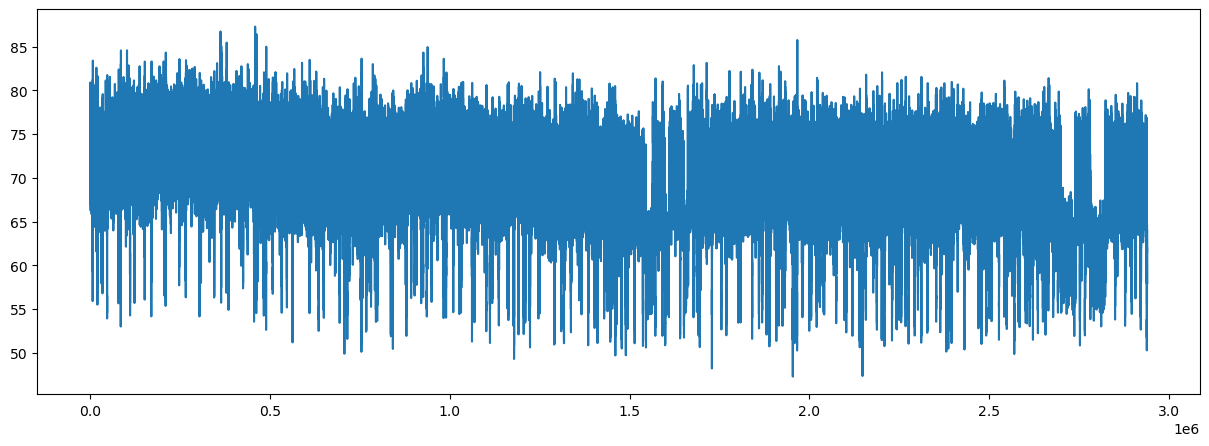

In [121]:
plt.figure(figsize=(15,5))
plt.plot(data['건조 1존 OP'])

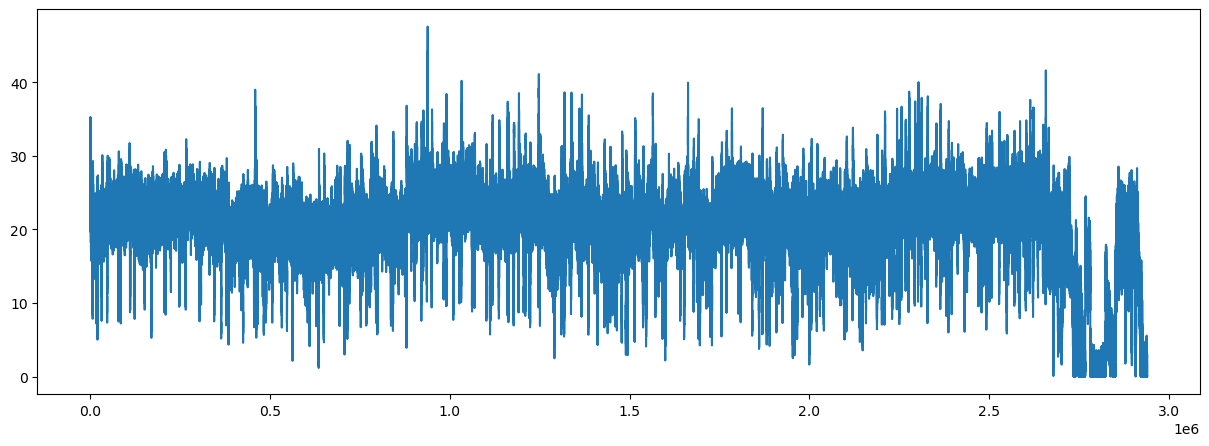

In [122]:
plt.figure(figsize=(15,5))
plt.plot(data['건조 2존 OP'])

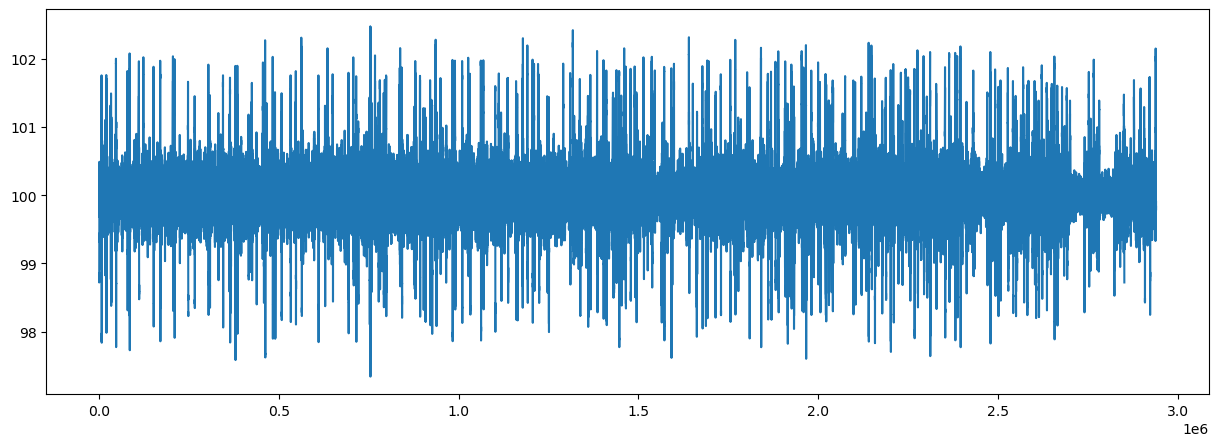

In [123]:
plt.figure(figsize=(15,5))
plt.plot(data['건조로 온도 1 Zone'])

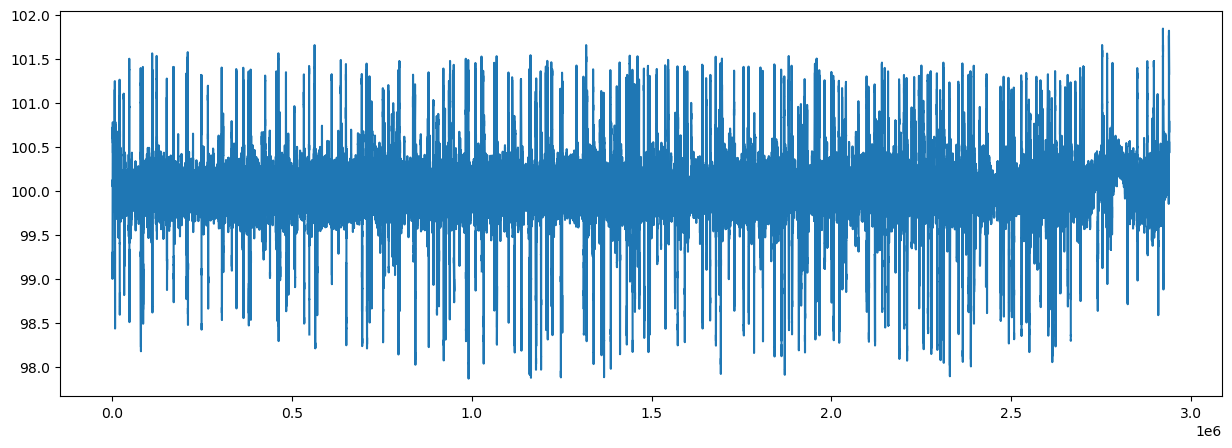

In [124]:
plt.figure(figsize=(15,5))
plt.plot(data['건조로 온도 2 Zone'])

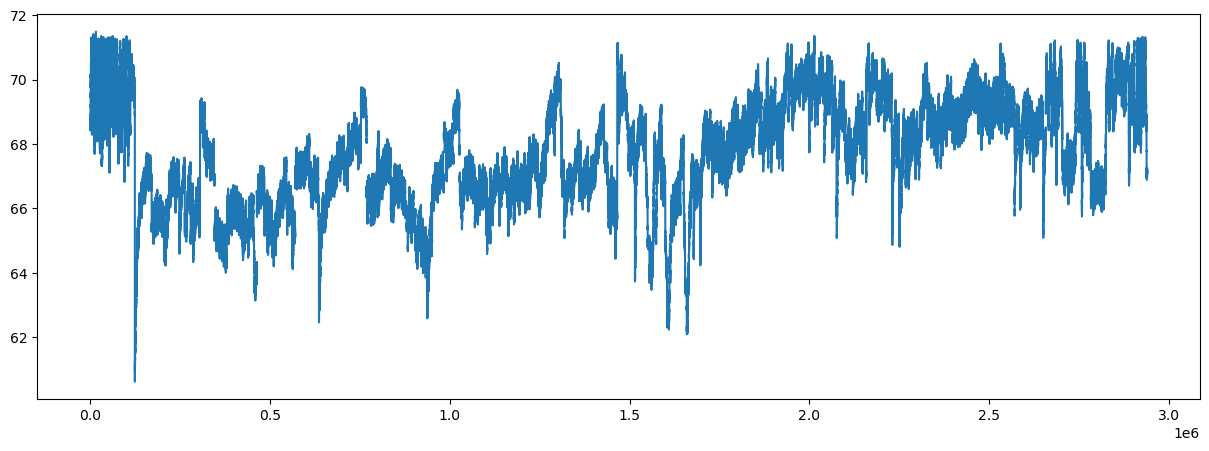

In [125]:
plt.figure(figsize=(15,5))
plt.plot(data['세정기'])

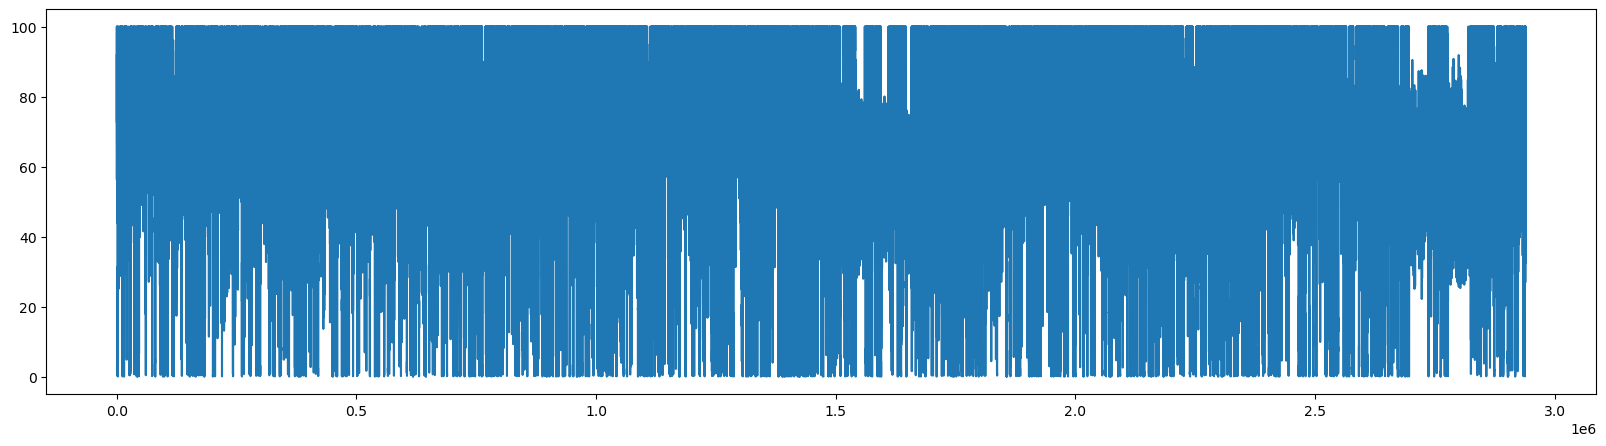

In [126]:
plt.figure(figsize=(20,5))
plt.plot(data['소입1존 OP'])

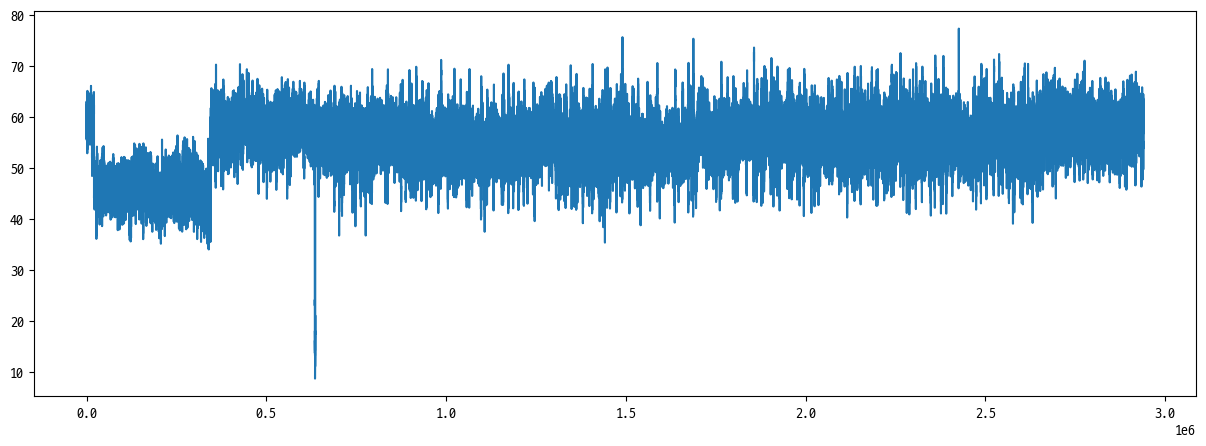

In [78]:
plt.figure(figsize=(15,5))
plt.plot(data['소입2존 OP'])

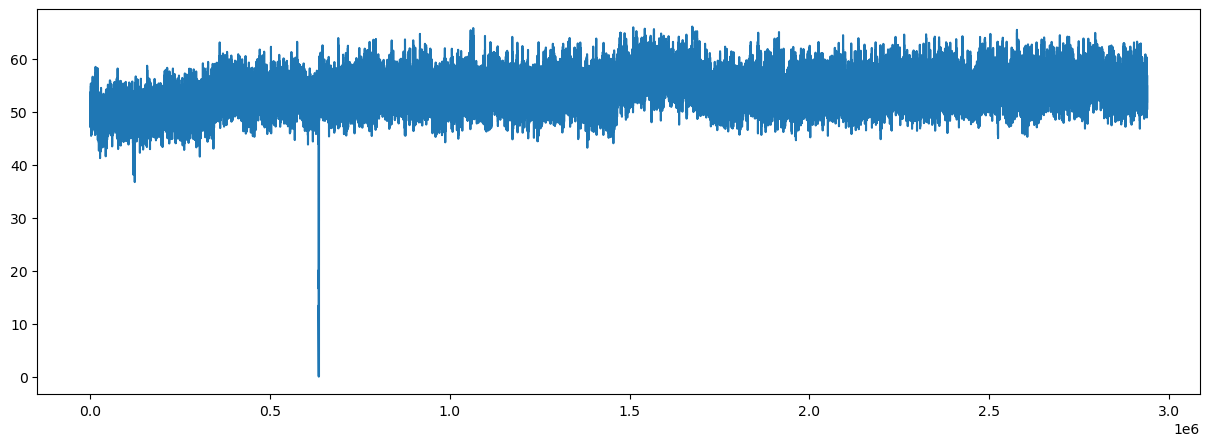

In [128]:
plt.figure(figsize=(15,5))
plt.plot(data['소입3존 OP'])

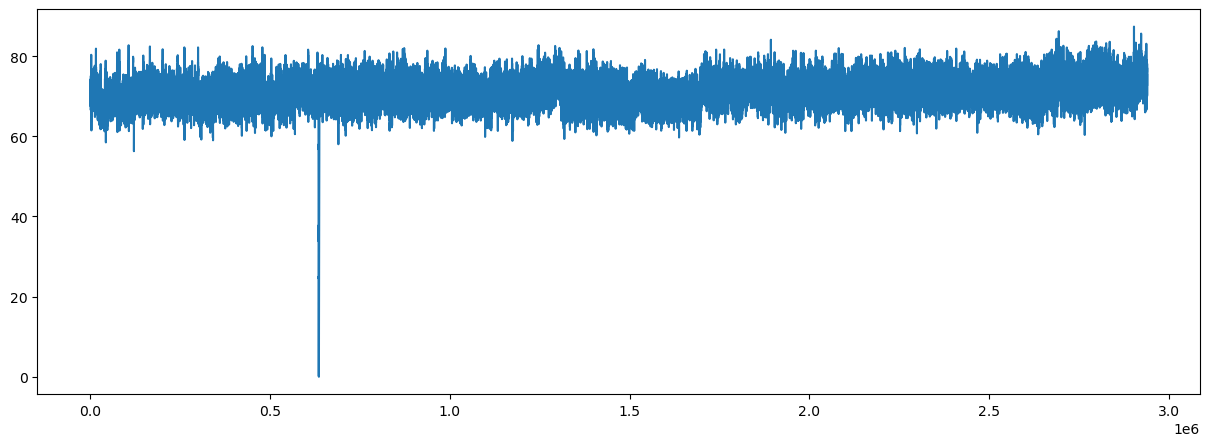

In [129]:
plt.figure(figsize=(15,5))
plt.plot(data['소입4존 OP'])

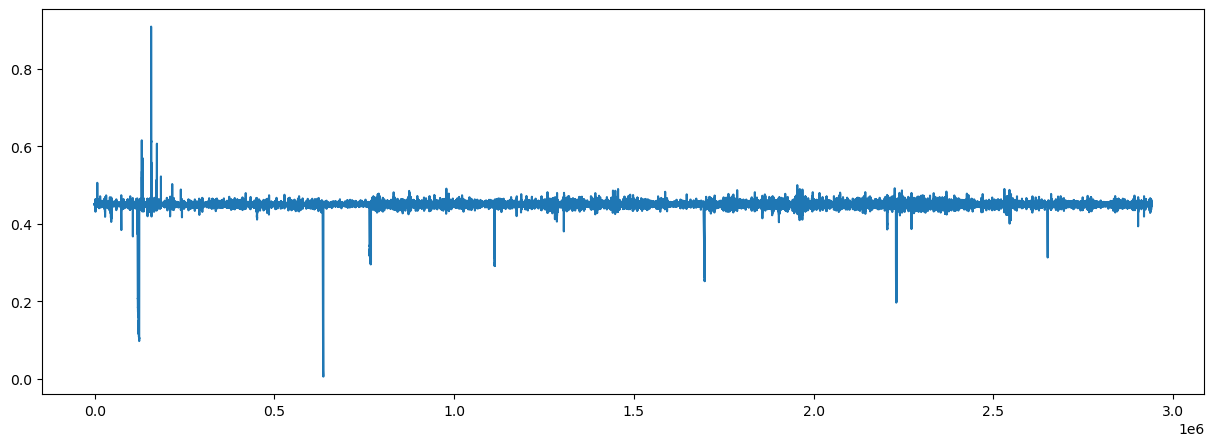

In [130]:
plt.figure(figsize=(15,5))
plt.plot(data['소입로 CP 값'])

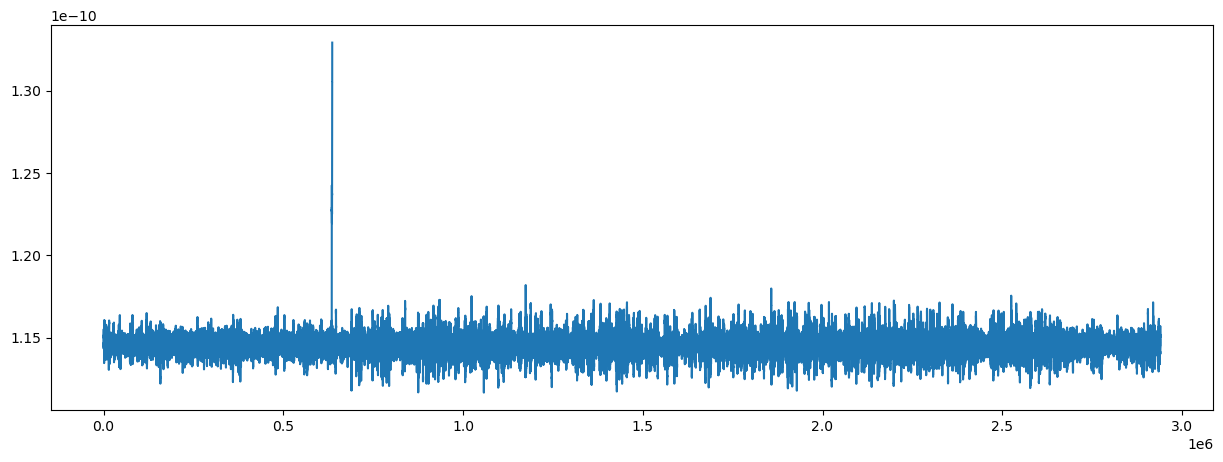

In [131]:
plt.figure(figsize=(15,5))
plt.plot(data['소입로 CP 모니터 값'])

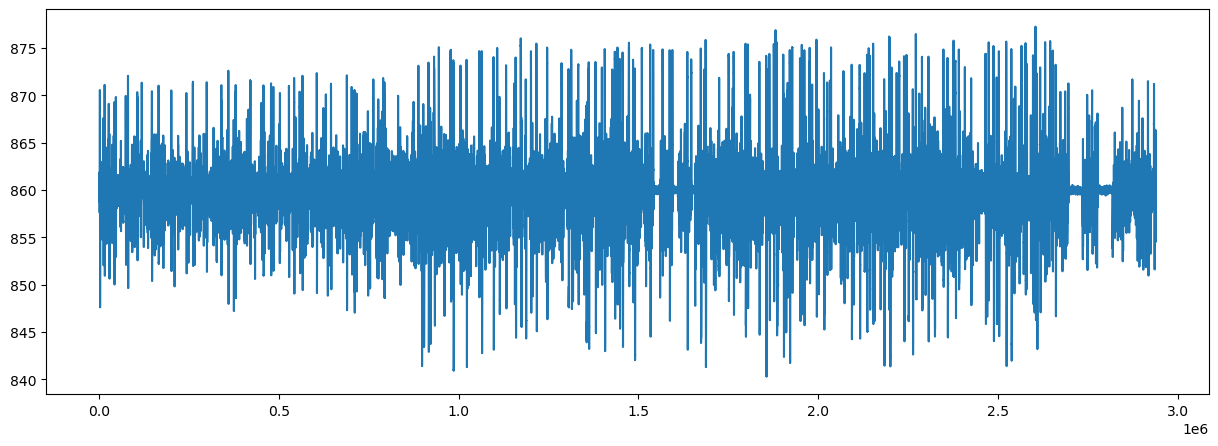

In [132]:
plt.figure(figsize=(15,5))
plt.plot(data['소입로 온도 1 Zone'])

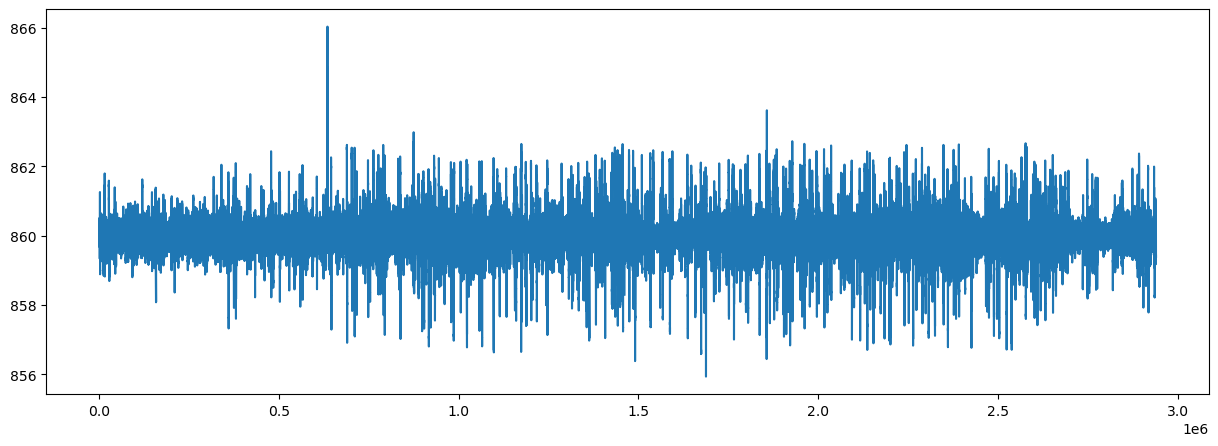

In [133]:
plt.figure(figsize=(15,5))
plt.plot(data['소입로 온도 2 Zone'])

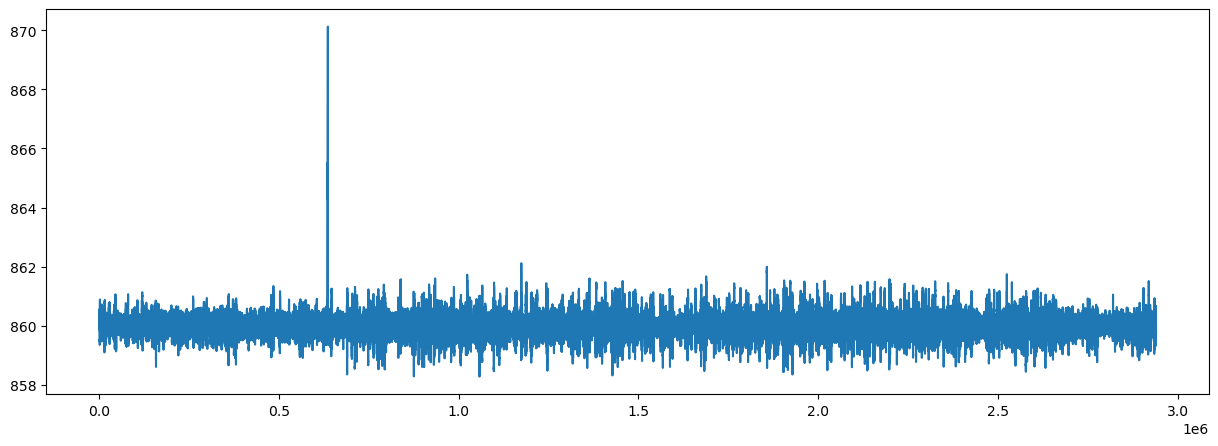

In [134]:
plt.figure(figsize=(15,5))
plt.plot(data['소입로 온도 3 Zone'])

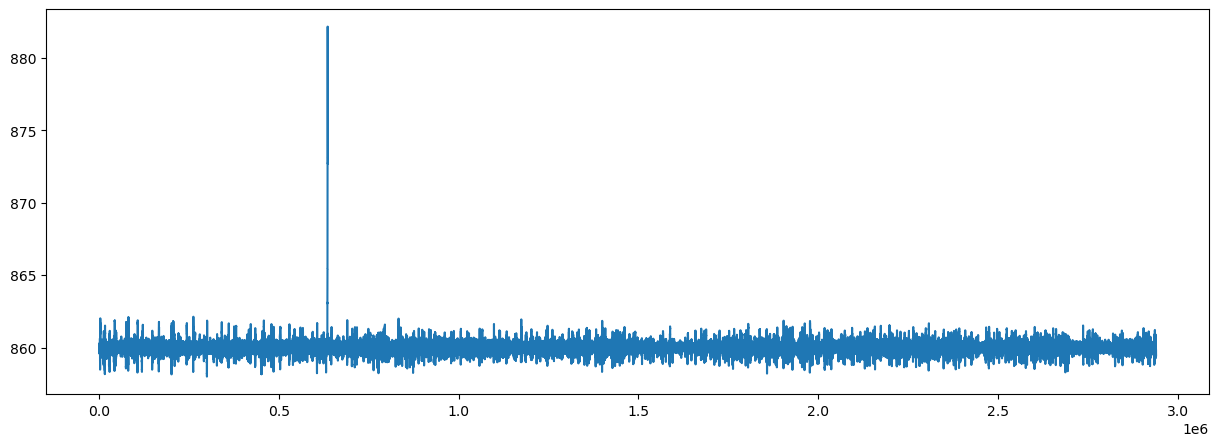

In [135]:
plt.figure(figsize=(15,5))
plt.plot(data['소입로 온도 4 Zone'])

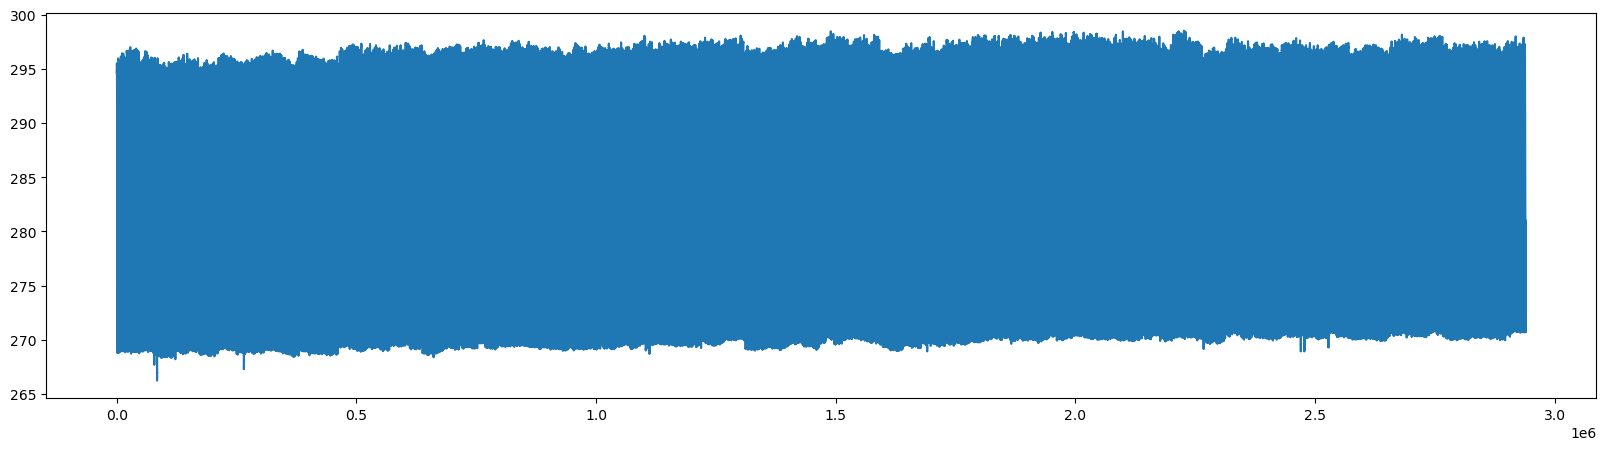

In [136]:
plt.figure(figsize=(20,5))
plt.plot(data['솔트 컨베이어 온도 1 Zone'])

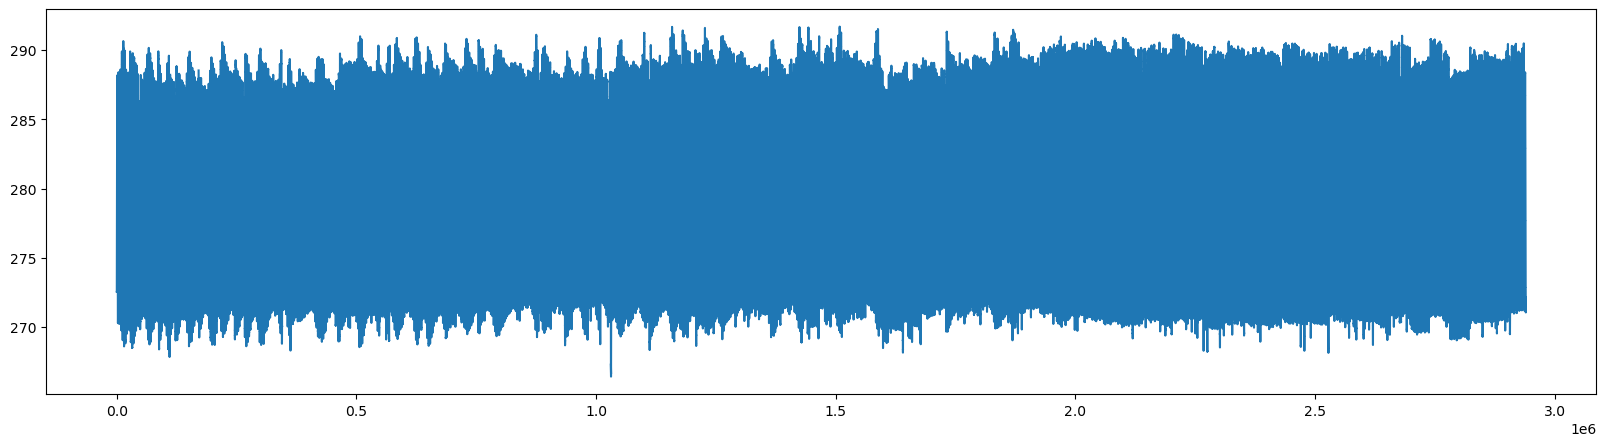

In [137]:
plt.figure(figsize=(20,5))
plt.plot(data['솔트 컨베이어 온도 2 Zone'])

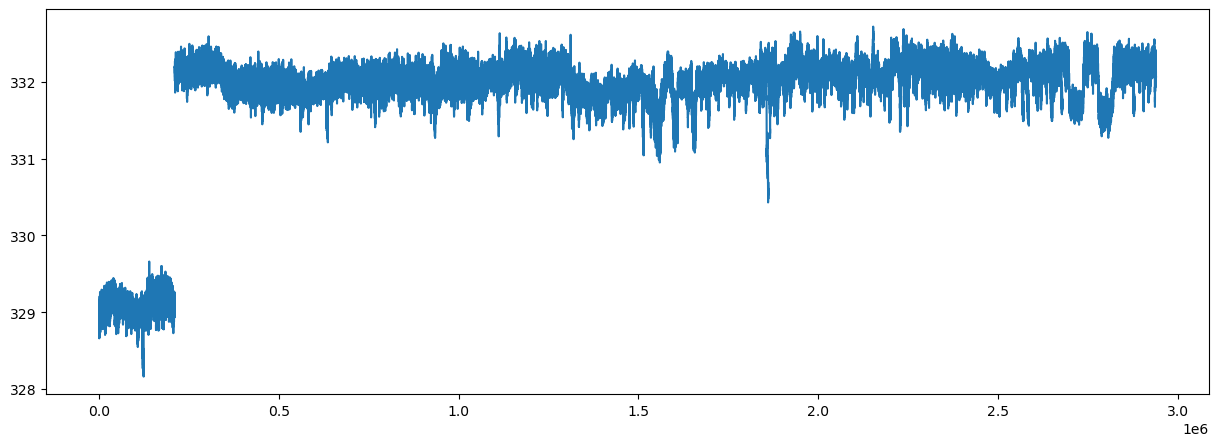

In [138]:
plt.figure(figsize=(15,5))
plt.plot(data['솔트조 온도 1 Zone'])

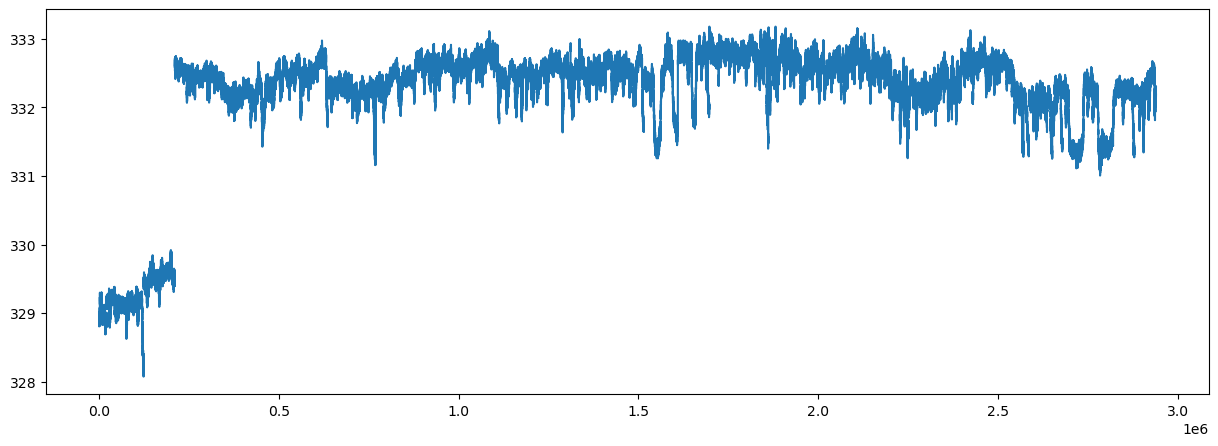

In [139]:
plt.figure(figsize=(15,5))
plt.plot(data['솔트조 온도 2 Zone'])

### 완전성
99.79443634466116

In [ ]:
data = pd.read_csv('dataset/data.csv', encoding='cp949')
data.head()

In [ ]:
perc=30
(data.isna().sum()/len(data))*100

In [ ]:
perc=30
((data.isna().sum()/len(data))*100)>perc

In [ ]:
data.isnull().sum()

In [ ]:
len(data)

In [ ]:
(1-(data.isnull().sum().sum()/len(data))) * 100

### 유일성
100

In [ ]:
group = data.groupby('TAG_MIN').size()
group

In [ ]:
(len(group)/len(data)) * 100

### 유효성
100

In [ ]:
len(data['배정번호'].unique())

In [ ]:
len(quality['배정번호'].unique())

In [ ]:
data['배정번호'].unique()

In [ ]:
data['TAG_MIN']=pd.to_datetime(data['TAG_MIN'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [ ]:
data[data['TAG_MIN'].isnull()]

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
quality

In [ ]:
data.min()

In [ ]:
data.max()

### 일관성
100

In [ ]:
data.info()

### 정확성

In [ ]:
data

In [ ]:
train

In [ ]:
train.describe()

In [ ]:
data.describe()

### 무결성